In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
weather_data = pd.read_csv("weather.csv")
weather_data
Temp_data=pd.read_csv("temperature.csv")
Temp_data
Incidence_data=pd.read_csv("_cleaned_incidence_rate.csv")
Incidence_data.head()

,location_name,sex_name,age_name,cause_name,val
0,Alabama,Male,30 to 34,Eating disorders,314.156047
1,Alabama,Female,70 to 74,Anxiety disorders,330.402128
2,Alabama,Male,75 to 79,Anxiety disorders,332.234053
3,Alabama,Female,75 to 79,Anxiety disorders,274.168163
4,Alabama,Male,80 plus,Anxiety disorders,221.386348


In [4]:

Incidence_data1=Incidence_data.groupby(['cause_name']).sum()/1000
Incidence_data1.reset_index(inplace=True)
Incidence_data1
total=Incidence_data1['val'].sum()
total

Incidence_data1['Percentage']=Incidence_data1['val']/total
Incidence_data1

Incidence_data1 = Incidence_data1.sort_values(["Percentage"], ascending=False).head(10)
Incidence_data1.head()
Incidence_data1=Incidence_data1.style.format({'Percentage': '{:,.2%}'.format})
Incidence_data1


,cause_name,val,Percentage
16,Mental disorders,9150.96,30.37%
11,Depressive disorders,7714.85,25.60%
15,Major depressive disorder,7223.58,23.97%
20,Substance use disorders,1797.58,5.97%
0,Alcohol use disorders,1509.44,5.01%
3,Anxiety disorders,1038.85,3.45%
13,Dysthymia,491.273,1.63%
12,Drug use disorders,288.135,0.96%
14,Eating disorders,233.436,0.77%
7,Bulimia nervosa,211.544,0.70%


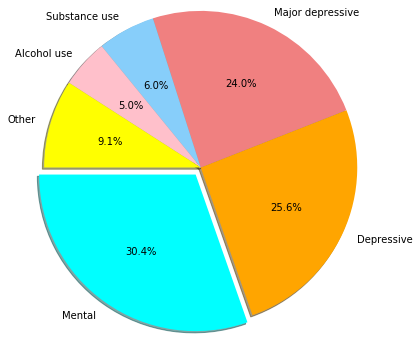

In [5]:
# Labels for the sections of our pie chart
labels = ["Mental", "Depressive", "Major depressive", "Substance use","Alcohol use","Other"]

# The values of each section of the pie chart
sizes = [9150, 7714, 7223, 1797,1509,2740]

# The colors of each section of the pie chart
colors = ["aqua", "orange", "lightcoral", "lightskyblue","pink","yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180,radius=1.8)


plt.savefig("./Pie.png")
plt.show()

In [6]:
Incidence_data2=Incidence_data.groupby(['location_name','cause_name']).sum()
Incidence_data2.reset_index(inplace=True)
Incidence_data2
Incidence_data2.columns
Incidence_data2.cause_name.unique()
Incidence_data_list=['Depressive disorders','Major depressive disorder']
Incidence_sv=Incidence_data2[Incidence_data2.cause_name.isin(Incidence_data_list)]
Incidence_sv
Incidence_data3=Incidence_sv.groupby(['location_name']).sum()
Incidence_data3
Incidence_data3.reset_index(inplace=True)
Incidence_data4=Incidence_data3.rename(columns={'location_name': 'State','val':'Incidence rate'})
Incidence_data4.head()


,State,Incidence rate
0,Alabama,285260.918814
1,Alaska,306732.419234
2,Arizona,320307.295471
3,Arkansas,334072.647169
4,California,257912.412447


In [12]:
rainfall_depression_data=pd.merge(weather_data,Incidence_data4,on='State')
rainfall_depression_data.head()
rainfall_temp_depression_data=pd.merge(rainfall_depression_data,Temp_data,on='State')
rainfall_temp_depression_data.head()
rainfall_temp_depression=rainfall_temp_depression_data.rename(columns={'Avg °F': 'temperature'})
rainfall_temp_depression.head()
rainfall_temp_depression1 = rainfall_temp_depression.sort_values(["Incidence rate"], ascending=False).head(10)
rainfall_temp_depression1.head()
#rainfall_temp_depression = rainfall_temp_depression.sort_values(["Inches"], ascending=False).head(10)
#rainfall_temp_depression.head()

,State,Inches,metres,Rank,Incidence rate,temperature,Avg °C,Rank
43,Utah,12.2,310,49,370059.350353,48.6,9.2,32
30,New Mexico,14.6,370,46,337430.790082,53.4,11.9,21
47,West Virginia,45.2,1147,17,335908.311735,51.8,11.0,23
3,Arkansas,50.6,1284,8,334072.647169,60.4,15.8,9
25,Montana,15.3,390,45,330867.742974,42.7,5.9,45


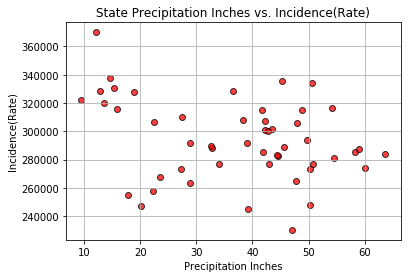

In [13]:
plt.scatter(rainfall_depression_data["Inches"], rainfall_depression_data["Incidence rate"], marker="o",facecolors="red", edgecolors="black",
         alpha=0.75)

plt.title("State Precipitation Inches vs. Incidence(Rate)")
plt.ylabel("Incidence(Rate)")
plt.xlabel("Precipitation Inches")
plt.grid(True)
plt.savefig("./Precipitation_Incidence.png")
plt.show()


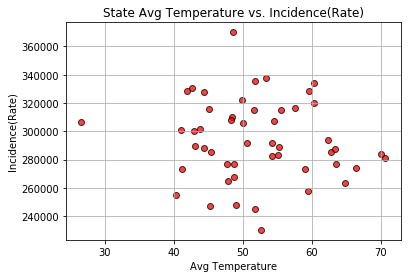

In [14]:
plt.scatter(rainfall_temp_depression["temperature"], rainfall_temp_depression["Incidence rate"], marker="o",facecolors="red", edgecolors="black",
         alpha=0.75)

plt.title("State Avg Temperature vs. Incidence(Rate)")
plt.ylabel("Incidence(Rate)")
plt.xlabel("Avg Temperature")
plt.grid(True)
plt.savefig("./Temperature_Incidence.png")
plt.show()

In [15]:
rainfall_temp_depression_final=rainfall_temp_depression[['State','temperature','Inches','Incidence rate']]
rainfall_temp_depression_final.head()
#item_table6=item_table5[['Item ID','Item Name','Purchase Count','Average Purchase Price','Total Purhse Value']]
#item_table6


,State,temperature,Inches,Incidence rate
0,Alabama,62.8,58.3,285260.918814
1,Alaska,26.6,22.5,306732.419234
2,Arizona,60.3,13.6,320307.295471
3,Arkansas,60.4,50.6,334072.647169
4,California,59.4,22.2,257912.412447


In [16]:
rainfall_temp_depression_final.corr()

#plt.imshow(rainfall_temp_depression_final.corr(),cmap='hot',interpolation='nearest')

import seaborn as sns
%matplotlib inline

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

rainfall_temp_depression_final.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


#plt.savefig("./correlation.png")
#plt.show()


,temperature,Inches,Incidence rate
temperature,1,0.54,-0.11
Inches,0.54,1,-0.3
Incidence rate,-0.11,-0.3,1


Summary:

question: There are many facors to cause the mental health nowdays. such as using drugs, alcohol.. The data shows more than 50% are caused from depression. Will Temperature and Precipitation affect the depression? 

After the analysis, we found out there is no correlation between precipiation and depression. For example, by looking at the state that has the highest incidence rate, Utah and New Mexico, the average precipitation are very small. and Hawaii has the most rainfall during the year, but the depression rate are really low. 
Also there is no correlation between temperature and depression. most of people are living around the averge 40-60 F. By looking at the scatter plot, for the incidence rate from 280000 to 340000, they are fall under the range from 40-60 F. There are no trends to show any correlations.

